## Import libs

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_LAB import *
from package_DBR import *

## LeadLag

In [9]:
help(LeadLag_System)

Help on function LeadLag_System in module package_LAB:

LeadLag_System(MV, Kp, Tlag, Tlead, Ts, PV, PVInit=0, method='EBD')
    The function "FO_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlag: lag time constant [s]
    :Tlead: lead time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
      EBD: Euler Backward difference
      EFD: Euler Forward difference
      TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



## Params for Lead-Lag

In [10]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []

# Parameters
Kp = 1
Tlead = 1
Tlag = 2
theta = 10

## Simulate Lead-Lag response to steps

(0.0, 100.0)

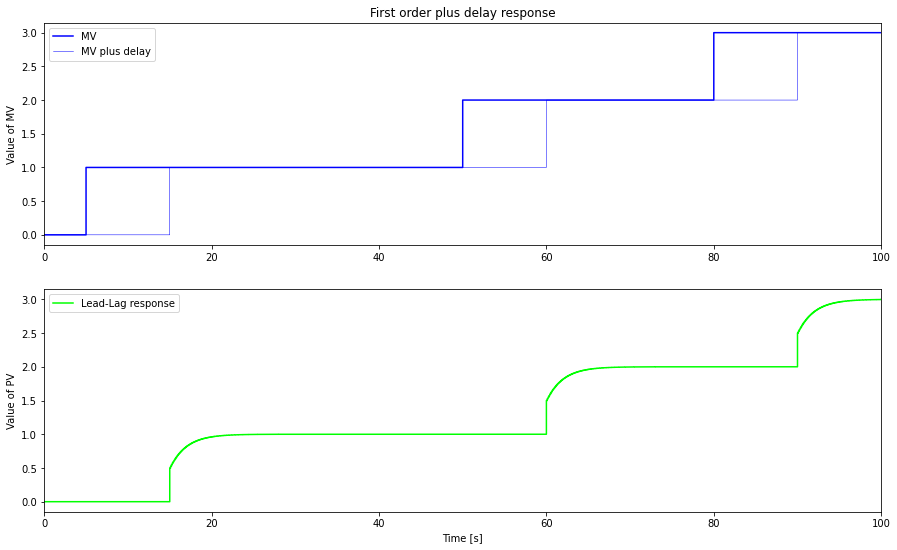

In [11]:
for i in range(0,N):
  t.append(i*Ts)
  SelectPath_RT(MVPath,t,MV)
  Delay_RT(MV,theta,Ts,MVDelay)
  LeadLag_System(MVDelay,Kp,Tlag,Tlead,Ts,PV_EBD)
  LeadLag_System(MVDelay,Kp,Tlag,Tlead,Ts,PV_EFD,0,'EFD')

plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
# plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead-Lag response',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

## PID()

In [12]:
help(PID)

Help on function PID in module package_LAB:

PID(PV, SP, MV, Ts, Kc, Ti, Td, alpha, approximationType, man=False, manMV=[0], MVmin=0, MVmax=100)
    parameters : 
    • PV : array of all recorded PV values
    • SP : current SP value
    • MV : dict of all recorded MV ({"MV" : [0], "MVp" : [0], "MVi": [0], "MVd": [0], "E" : [0]})
    • Ts : Sample time (seconds)
    • Kc : PID gain
    • Ti : PID Integration time constant
    • Td : PID Derivation time constant
    • alpha : proportional parameter between Td and Tfd
    • approximationType : list of approximation types for integration and derivation ( looks like : ["EBD", "TRAP"])
    • man : boolean, true if manual mode is enabled
    • manMV : array of manual MV values
    • MVmin : minimum value of MV (default : 0)
    • MVmax : maximum value of MV (default : 100)



## Set parameters for PID

In [13]:
Kc = 1.1
Ti = 10
Td = 5
alpha = 0.5
discretisation = ["TRAP", "TRAP"]

PV = []
MV = {"MV" : [],
      "MVp" : [],
      "MVi": [], 
      "MVd": [], 
      "E" : []}

Ts = 0.01
TSim = 50

N = int(TSim/Ts)+1

t = []
SP = []
SPPath = {0: 0, 5: 20}

for i in range(0,N):
  PV.append(0)
  t.append(i*Ts)
  SelectPath_RT(SPPath,t,SP)

## Plot step response of PID

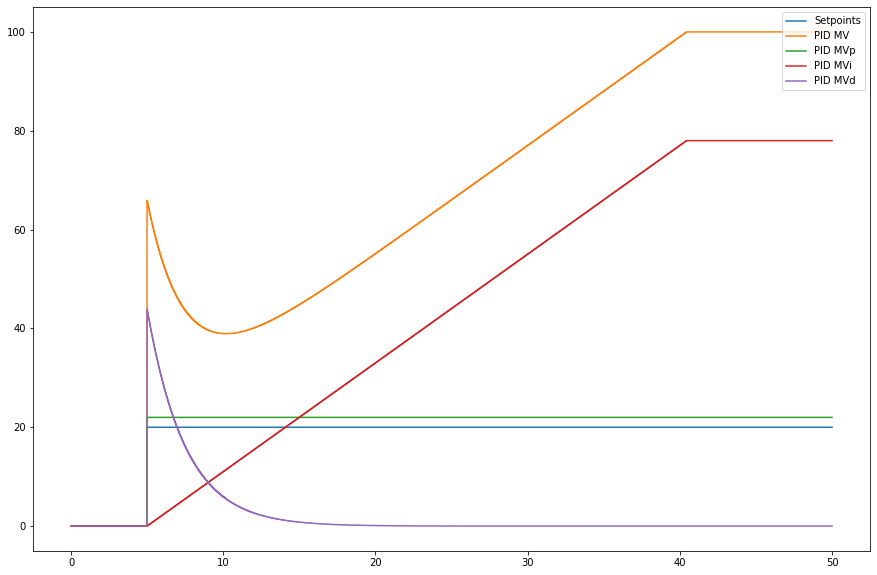

In [14]:


for i in range(0, N):
  PID_OUT = PID(PV, SP[i], MV, Ts, Kc, Ti, Td, alpha, discretisation)
  MV["MV"].append(PID_OUT["MV"])
  MV["MVp"].append(PID_OUT["MVp"])
  MV["MVi"].append(PID_OUT["MVi"])
  MV["MVd"].append(PID_OUT["MVd"])
  MV["E"].append(PID_OUT["E"])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.step(t, np.array(SP), label='Setpoints')
plt.step(t, np.array(MV["MV"]), label='PID MV')
plt.step(t, np.array(MV["MVp"]), label='PID MVp')
plt.step(t, np.array(MV["MVi"]), label='PID MVi')
plt.step(t, np.array(MV["MVd"]), label='PID MVd')

plt.legend(loc='upper right')



plt.show()